In [ ]:
 import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_2019 = pd.read_excel('/content/Forbes-2019.xlsx')

In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Name          2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         1998 non-null   float64
 4   Profit        1999 non-null   float64
 5   Assets        1995 non-null   float64
 6   Market Value  2000 non-null   float64
 7   Year          2000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 125.1+ KB


In [ ]:
df_2019.drop('Year',inplace=True, axis=1)

In [ ]:
df_2019.describe()

,Sales,Profit,Assets,Market Value
count,1998.000000,1999.000000,1995.000000,2000.000000
mean,20.599341,1.704757,93.582153,28.408047
std,35.458484,3.726064,284.951617,60.025556
min,-9.140000,-22.367000,1.537000,0.009000
25%,4.748500,0.420500,12.042000,6.857000
50%,10.255500,0.776000,26.254000,13.366500
75%,20.588250,1.684000,61.000000,27.474000
max,514.405000,59.431000,4034.482000,961.257000


checking for null values

In [ ]:
df_2019.isna().sum()

Rank            0
Name            0
Country         0
Sales           2
Profit          1
Assets          5
Market Value    0
Year            0
dtype: int64

removing duplicates

In [ ]:
df_2019 = df_2019.drop_duplicates(subset=['Name','Country','Sales','Profit','Assets','Market Value'])

Handling missing data


In [ ]:
df_2019.dropna()

,Name,Country,Sales,Profit,Assets,Market Value
0,ICBC,China,175.874,45.223,4034.482,305.057
1,JPMorgan Chase,United States,132.912,32.738,2737.188,368.502
2,China Construction Bank,China,150.313,38.841,3382.422,224.988
3,Agricultural Bank of China,China,137.456,30.894,3293.105,197.045
4,Bank of America,United States,111.904,28.540,2377.164,287.339
...,...,...,...,...,...,...
1995,Thai Oil,Thailand,12.044,0.314,8.260,4.615
1996,Bed Bath & Beyond,United States,12.029,-0.137,6.619,2.302
1997,Incyte,United States,1.882,0.109,2.646,15.847
1998,Fuyo General Lease,Japan,5.574,0.209,23.179,1.530


In [ ]:
df_2019.isnull()

,Name,Country,Sales,Profit,Assets,Market Value
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1995,False,False,False,False,False,False
1996,False,False,False,False,False,False
1997,False,False,False,False,False,False
1998,False,False,False,False,False,False


In [ ]:
df_2019.Country.replace('',np.nan) 

0               China
1       United States
2               China
3               China
4       United States
            ...      
1995         Thailand
1996    United States
1997    United States
1998            Japan
1999    United States
Name: Country, Length: 2000, dtype: object

In [ ]:
col=['Sales','Profit','Assets','Market Value'] #handling numeric missing data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
df_2019[col]=imputer.fit_transform(df_2019[col])

In [ ]:
df_2019.isna().sum()

Name            0
Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

Outliers

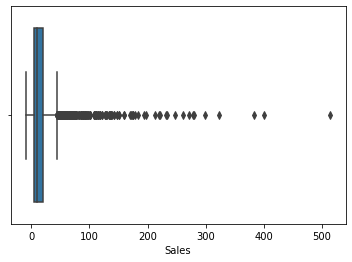

In [ ]:
sns.boxplot(x = df_2019['Sales'])

In [ ]:
sales_outlier = df_2019[df_2019['Sales']>=400].index
df_2019.drop(sales_outlier, inplace=True)

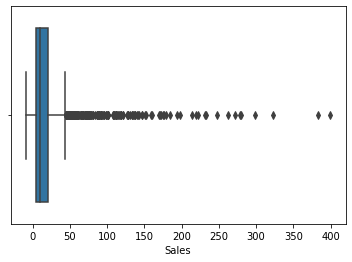

In [ ]:
sns.boxplot(x = df_2019['Sales'])

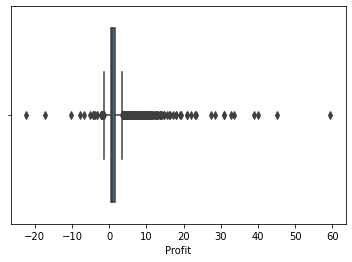

In [ ]:
sns.boxplot(x=df_2019['Profit'])

In [ ]:
profit_outlier = df_2019[df_2019['Profit']>=50].index
df_2019.drop(profit_outlier, inplace=True)


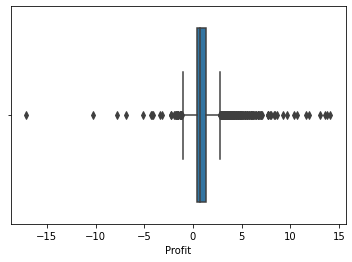

In [ ]:
sns.boxplot(x=df_2019['Profit'])

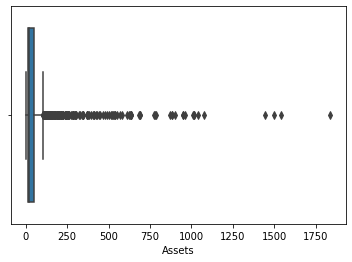

In [ ]:
sns.boxplot(x = df_2019['Assets'])

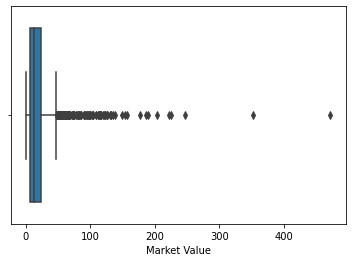

In [ ]:
sns.boxplot(x = df_2019['Market Value'])

In [ ]:
Market_Value_outlier = df_2019[df_2019['Market Value']>=300].index
df_2019.drop(Market_Value_outlier, inplace=True)

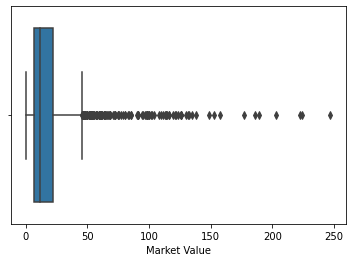

In [ ]:
sns.boxplot(x = df_2019['Market Value'])

Vizualization


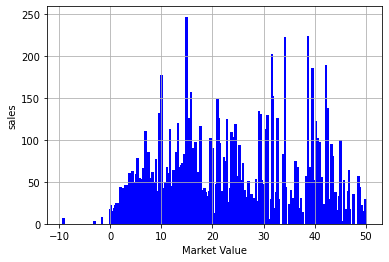

In [ ]:
Y=df_2019['Sales']
X=df_2019['Market Value']
plt.bar(Y,X,color= 'Blue',width = 0.5) #use hist
plt.ylabel("sales")
plt.xlabel("Market Value")
plt.grid()

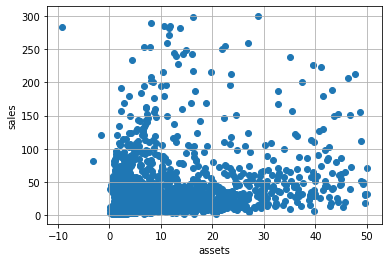

In [ ]:
Y=df_2019['Sales']
X=df_2019['Assets']
plt.scatter(Y,X)
plt.ylabel("sales")
plt.xlabel("assets")
plt.grid()

Modelling Of Data

In [ ]:
df_2019.head()

,Name,Country,Sales,Profit,Assets,Market Value
82,American Express,United States,43.282,6.867,188.602,95.340
91,Oracle,United States,39.620,10.751,109.438,186.330
101,British American Tobacco,United Kingdom,32.658,8.043,186.381,90.924
108,BHP Group,Australia,42.556,6.030,102.414,138.278
110,Rio Tinto,United Kingdom,40.533,13.782,90.949,99.964


In [ ]:
x =df_2019.drop(['Name','Country'], axis=1)
x.head()

,Sales,Profit,Assets,Market Value
82,43.282,6.867,188.602,95.340
91,39.620,10.751,109.438,186.330
101,32.658,8.043,186.381,90.924
108,42.556,6.030,102.414,138.278
110,40.533,13.782,90.949,99.964


In [ ]:
y=df_2019['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.9999588307495619